<b>Project 1 - Team Group 1: Gabby, Zach, Peter and Hovig</b>

In [163]:
import networkx as nx
import numpy as np
from scipy import ndimage as nd
from skimage import io, segmentation, color, measure
from skimage.future import graph
from skimage.color import rgb2lab
import matplotlib.pyplot as plt
import math

<i><u>Load original image and apply segmentation:</u></i>

'Original pic >'

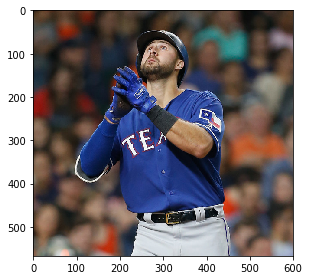

In [164]:
img_url = ('https://raw.githubusercontent.com/hovig/MSDS_CUNY/master/DATA620/project1/Texas_Rangers_gallo.jpg')
img = io.imread(img_url);
io.imshow(img);
display("Original pic >")
seg = segmentation.slic(img, n_segments=30, compactness=40.0, enforce_connectivity=True, sigma=3);

<i><u>Show segmented RGB labels:</u></i>

'Show segmented RGB labels >'

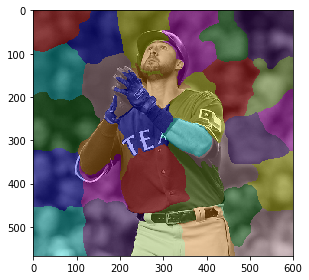

In [165]:
io.imshow(color.label2rgb(seg, img));
display("Show segmented RGB labels >");

<i><u>Show Region Adjacency Graph:</u></i>

'Show Region Adjacency Graph >'

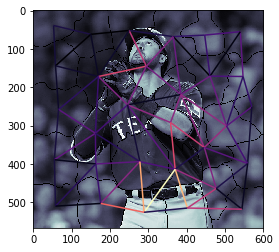

In [166]:
graph.show_rag(seg, graph.rag_mean_color(img, seg), img); 
display("Show Region Adjacency Graph >");

<i><u>RGB to lab color space conversion:</u></i>

'RGB to lab color space conversion >'

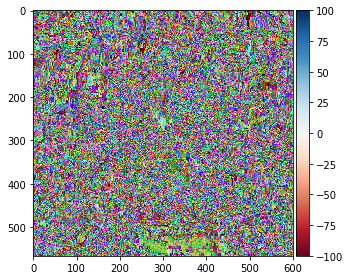

In [167]:
io.imshow(rgb2lab(img))
display("RGB to lab color space conversion >")

<i><u>Apply edge neighboring filtration and extract counts of color and of pixels:</u></i>

In [168]:
display("Apply edge neighboring filtration and extract counts of color and of pixels >");
def filtering_edge(values, graph):
    center = values[len(values) // 2]
    for neighbor in values:
        if neighbor != center and not graph.has_edge(center, neighbor):
            graph.add_edge(center, neighbor)
    return 0

def process_rag(labels, image):
    G = nx.Graph()
    footprint = nd.generate_binary_structure(labels.ndim, connectivity=1)
    _fp_ = nd.generic_filter(labels, filtering_edge, footprint=footprint, mode='nearest', extra_arguments=(G,))
    for n in G:
        G.node[n]['total color'] = np.zeros(3, np.double)
        G.node[n]['pixel count'] = 0
    for index in np.ndindex(labels.shape):
        n = labels[index]
        G.node[n]['total color'] += image[index]
        G.node[n]['pixel count'] += 1
    return G

'Apply edge neighboring filtration and extract counts of color and of pixels >'

<i>Color count will be used to draw graph nodes.</i><br>
<i>Use pixel count for the mean and weight calculations for display on histogram:</i>

'Use pixel count for the mean and weight calculations for display on histogram >'

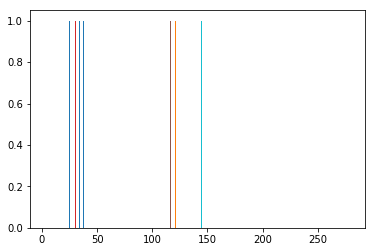

In [181]:
G = process_rag(seg, img)
for n in G:
    node = G.node[n]
    node['mean'] = node['total color'] / node['pixel count']
for u, v in G.edges():
    d = G.node[u]['mean'] - G.node[v]['mean']
    G[u][v]['weight'] = np.linalg.norm(d)
    plt.hist(G[u][v]['weight'])
    
display("Use pixel count for the mean and weight calculations for display on histogram >");

<i><u>General graph categorical information:</u></i>

In [170]:
display("General graph categorical information >");
print(nx.info(G))

'General graph categorical information >'

Name: 
Type: Graph
Number of nodes: 30
Number of edges: 70
Average degree:   4.6667


In [171]:
nx.is_connected(G)

True

In [172]:
nx.diameter(G)

6

In [173]:
nx.degree(G)

DegreeView({0.0: 2, 1.0: 4, 2.0: 4, 3.0: 5, 4.0: 3, 5.0: 3, 6.0: 5, 7.0: 4, 8.0: 7, 9.0: 4, 10.0: 6, 11.0: 7, 12.0: 7, 13.0: 3, 14.0: 4, 15.0: 6, 16.0: 6, 17.0: 4, 18.0: 6, 19.0: 7, 20.0: 6, 21.0: 4, 22.0: 5, 23.0: 5, 24.0: 5, 25.0: 4, 26.0: 4, 27.0: 3, 28.0: 3, 29.0: 4})

In [174]:
nx.center(G)

[11.0]

<i><u>Eigenvector and degree centralities:</u></i>

In [175]:
display("Eigenvector and degree centralities >");
eig_centrality = nx.eigenvector_centrality(G)
print(['%s %0.2f'%(node,eig_centrality[node]) for node in eig_centrality])

'Eigenvector and degree centralities >'

['0.0 0.04', '1.0 0.10', '2.0 0.14', '3.0 0.18', '4.0 0.08', '5.0 0.07', '6.0 0.23', '7.0 0.10', '8.0 0.24', '9.0 0.11', '10.0 0.18', '11.0 0.34', '12.0 0.31', '13.0 0.09', '14.0 0.13', '15.0 0.21', '16.0 0.23', '17.0 0.23', '18.0 0.26', '19.0 0.29', '20.0 0.24', '21.0 0.11', '22.0 0.16', '23.0 0.15', '24.0 0.18', '25.0 0.12', '26.0 0.14', '27.0 0.07', '28.0 0.09', '29.0 0.15']


In [176]:
deg_centrality = nx.degree_centrality(G)
print(['%s %0.2f'%(node,deg_centrality[node]) for node in deg_centrality])

['0.0 0.07', '1.0 0.14', '2.0 0.14', '3.0 0.17', '4.0 0.10', '5.0 0.10', '6.0 0.17', '7.0 0.14', '8.0 0.24', '9.0 0.14', '10.0 0.21', '11.0 0.24', '12.0 0.24', '13.0 0.10', '14.0 0.14', '15.0 0.21', '16.0 0.21', '17.0 0.14', '18.0 0.21', '19.0 0.24', '20.0 0.21', '21.0 0.14', '22.0 0.17', '23.0 0.17', '24.0 0.17', '25.0 0.14', '26.0 0.14', '27.0 0.10', '28.0 0.10', '29.0 0.14']


<i><u>Comparison of centrality measures across categorical groups:</u></i>

In [177]:
display("Comparison of centrality measures across categorical groups >");
bet_centrality = nx.betweenness_centrality(G);
print(['%s %0.2f'%(node,bet_centrality[node]) for node in bet_centrality]);

'Comparison of centrality measures across categorical groups >'

['0.0 0.00', '1.0 0.04', '2.0 0.06', '3.0 0.09', '4.0 0.01', '5.0 0.00', '6.0 0.07', '7.0 0.03', '8.0 0.18', '9.0 0.02', '10.0 0.10', '11.0 0.27', '12.0 0.22', '13.0 0.01', '14.0 0.03', '15.0 0.11', '16.0 0.12', '17.0 0.01', '18.0 0.09', '19.0 0.17', '20.0 0.12', '21.0 0.03', '22.0 0.05', '23.0 0.03', '24.0 0.04', '25.0 0.03', '26.0 0.03', '27.0 0.00', '28.0 0.01', '29.0 0.03']


In [178]:
clo_centrality = nx.closeness_centrality(G);
print(['%s %0.2f'%(node,clo_centrality[node]) for node in clo_centrality]);

['0.0 0.26', '1.0 0.33', '2.0 0.36', '3.0 0.38', '4.0 0.30', '5.0 0.28', '6.0 0.43', '7.0 0.32', '8.0 0.41', '9.0 0.31', '10.0 0.37', '11.0 0.49', '12.0 0.45', '13.0 0.30', '14.0 0.33', '15.0 0.38', '16.0 0.41', '17.0 0.41', '18.0 0.40', '19.0 0.43', '20.0 0.41', '21.0 0.32', '22.0 0.33', '23.0 0.34', '24.0 0.36', '25.0 0.32', '26.0 0.33', '27.0 0.27', '28.0 0.30', '29.0 0.35']


<i><u>Graph plot:</u></i>

'Draw graph for edges >'

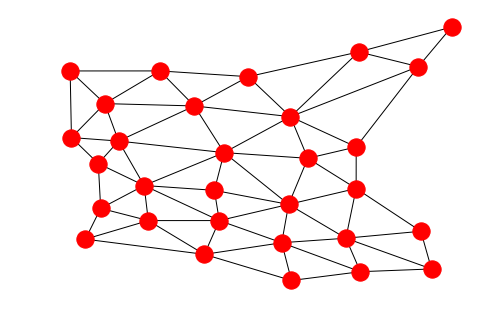

In [179]:
nx.draw(G);
display("Draw graph for edges >");

'Draw graph for nodes >'

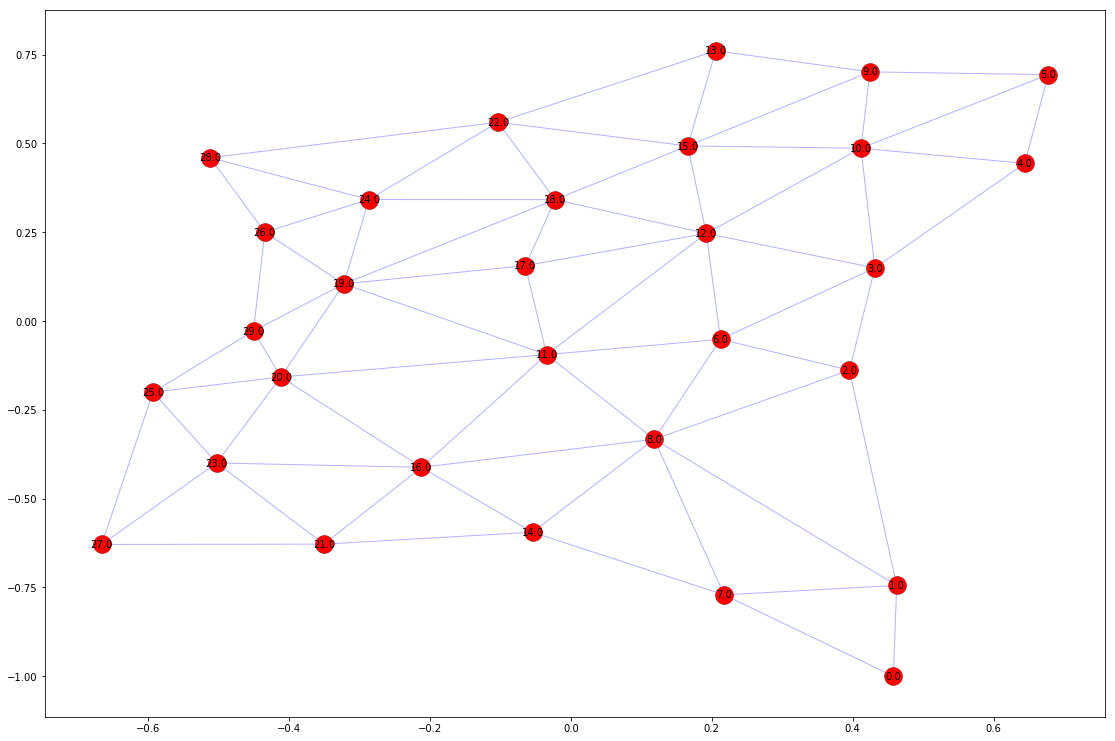

In [180]:
display("Draw graph for nodes >");
plt.figure(figsize=(19,13));
pos = nx.spring_layout(G,k=.12);
nx.draw_networkx_edges(G,pos, edge_color='b',alpha=.3);
nx.draw_networkx_nodes(G,pos,node_color='c',node_size=300);
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=300);
nx.draw_networkx_labels(G,pos,font_size=10,font_color='k');
plt.show();